This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 10 embryo particles with calculated initial status according to the hypothesis.

After that we, considering the collision and merger, integrate the system for 3000 time units and plot the figure.

In [1]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e3*2.*np.pi

#np.random.seed(12)

In [2]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [3]:
# Embryos
# 行星胚胎群 a = 6 AU
n_embryos = 10
e = random.randint(1,10)*0.001*np.pi/180
inc = random.randint(1,10)*0.001*np.pi/180
Omega = random.randint(0,360)*np.pi/180
omega = random.randint(0,360)*np.pi/180
m = 3*3.040432648022642e-06
r = 0.00012123
a_default = 6 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.7 * hillradii + 8 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, inc = inc, Omega = Omega, omega = omega, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [4]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	13
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7fb31be63598, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7fb31be63d08, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7fb31be63598, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7fb31be63d08, m=9.121297944067926e-06 x=3.084553856847183 y=-6.910273201415749 z=0.0003203858168611444 vx=0.3322574552312548 vy=0.14878601481908685 vz=-1.1204246223294049e-05>
<rebound.particle.Particle object at 0x7fb31be63598, m=9.121297944067926e-06 x=-6.4130825759068735 y=-4.121820142119828 z=0.000280966734

In [5]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06


In [6]:
sim.move_to_com()
E0 = sim.calculate_energy()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-doxv9z19 because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


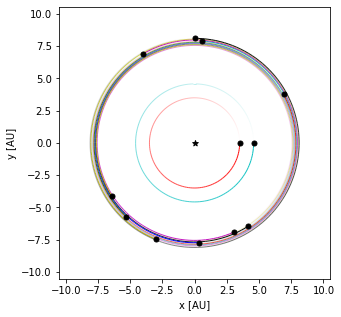

In [7]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [8]:
sim.getWidget(size=(500,300),scale=2.0*a_saturn)

Widget(N=13, count=2, height=300.0, orbit_data=b'\x9d)\x97\xbb\xe1\x9e\xdf8D\x10\xc8\xb1\x00\x00`@M\xc9_%\xdb\…

In [10]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

4.223681936737314e-06


In [11]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	11
Selected integrator: 	mercurius
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7fb34fbec488, m=1.0 x=-0.0010578970845721537 y=0.0031128318156552824 z=7.637093961276042e-09 vx=-0.0005029133855823519 vy=-0.00010866069956794774 vz=-7.596633343705637e-10>
<rebound.particle.Particle object at 0x7fb34fbec7b8, m=0.0009547919152112404 x=-0.11464400770509194 y=-3.480654000561284 z=1.4876942607252043e-07 vx=0.5353035047076855 vy=-0.016283377944513403 vz=2.789295690939902e-07>
<rebound.particle.Particle object at 0x7fb34fbec488, m=0.0002858856727222417 x=4.644524875310653 y=-0.0794561642403312 z=4.13018645824984e-06 vx=0.007078787784966548 vy=0.463079334367474 vz=-2.4018970335564247e-07>
<rebound.particle.Particle object at 0x7fb34fbec7b8, m=9.121297944067926e-06 x=1.